In [1]:
# Equity at the Two Ends of the 710 Freeway: Assessing Access to Parks for Tenants of Affordable Housing in the California Cities of Long Beach and Pasadena
### By Adriana Valencia Wences
### UP 206A: Introductiion to Geographic Information Systems and Spatial Data Analysis
### Fall 2021
### University of California, Los Angeles

In [2]:
# first I will import my libraries
# for spatial data
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
# import Affordable Housing data for the cities of Long Beach and Pasadena
aff_housing = gpd.read_file('final_data/data_lb_pasadena.csv')

In [4]:
# configure the place, network type, trip times, and travel speed
place = 'Long Beach, Los Angeles, CA, USA'
network_type = 'walk'
trip_times = [5, 10, 15, 20] #in minutes
meters_per_minute = 75 # travel distance per minute

In [5]:
# fetch OSM street network from location and add filter
graph = ox.graph_from_place(place, network_type='walk')

In [6]:
# check data type of graph
type(graph)

networkx.classes.multidigraph.MultiDiGraph

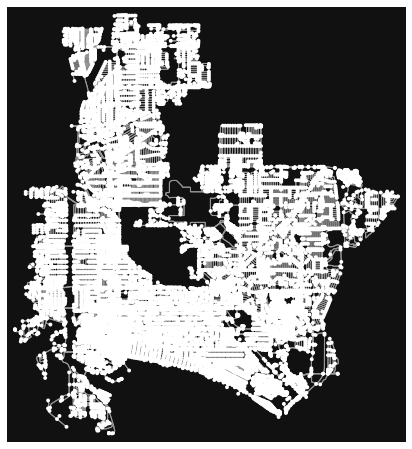

In [7]:
# quick plot using oxmnx
fig, ax = ox.plot_graph(graph)


In [8]:
# project our network data to Web Mercator (measurements are in meters)
G = ox.project_graph(graph, to_crs='epsg:3857')

<AxesSubplot:>

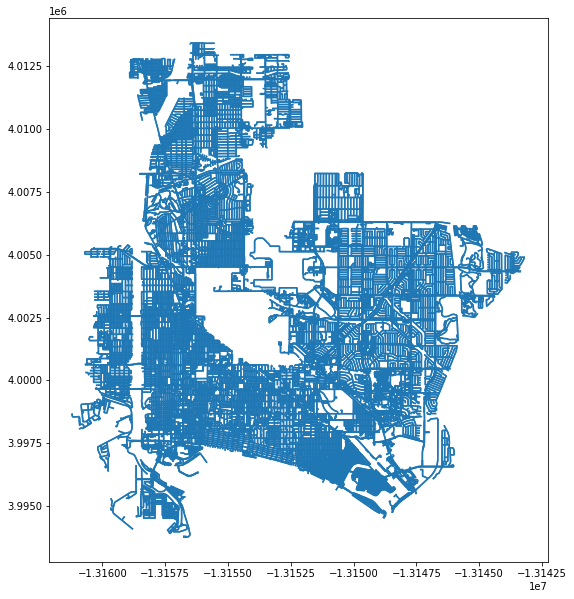

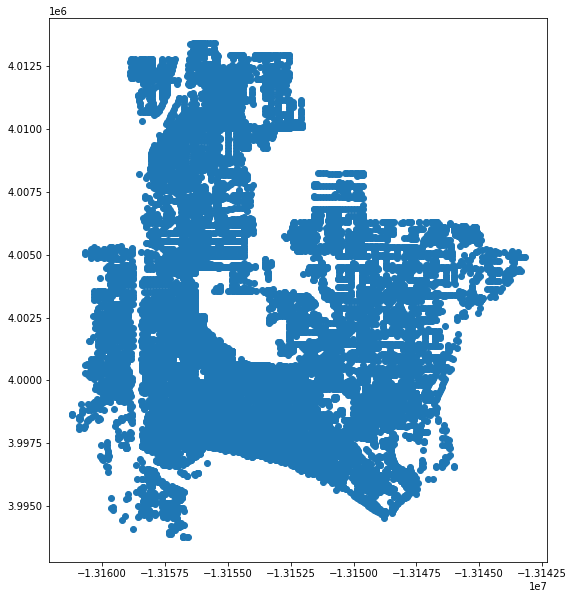

In [9]:
# convert nodes and edges to geodataframes
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_edges.plot(figsize=(10,10))
gdf_nodes.plot(figsize=(10,10))


In [10]:
# analyze network proprties 
# calculate network statistics
stats = ox.basic_stats(G, circuity_dist='euclidean')
stats

/opt/conda/lib/python3.9/site-packages/osmnx/stats.py:317: UserWarning: The `circuity_dist` argument has been deprecated and will be removed in a future release.
  warnings.warn(msg)


KeyboardInterrupt: 

In [ ]:
aff_housing_pts = ox.graph_from_point((12.9716, 77.5946), dist=100, network_type='walk')
ox.plot_graph(Graph)

In [ ]:
aff_housing.head

In [ ]:
new_aff_housing = aff_housing[aff_housing['City'] != 'Pasadena']

In [ ]:
aff_housing_coordinates = gpd.GeoDataFrame(new_aff_housing, geometry=gpd.points_from_xy(new_aff_housing.Longitude, new_aff_housing.Latitude))
len(aff_housing_coordinates)
aff_housing_coordinates.geometry

In [ ]:
osmnx.distance.nearest_nodes(G, X=, Y, return_dist=False)

In [ ]:
# parks
tags = {'leisure' : ['park','garden']}
park_data = ox.geometries_from_place(place, tags)

In [ ]:
aff_housing_sites = ox.graph_from_point((-118.17985, 33.77980), (-118.26940, 33.82600), (-118.21789, 33.81430), (-118.19332, 33.77567), (-118.18516, 33.78467), (-118.13452, 33.79652), (-118.14463, 33.80183), (-118.19183, 33.84261), (-118.19842, 33.77443), (-118.18364, 33.78976), (-118.18741, 33.77202), (-118.18254, 33.77956))
ox.plot_graph(aff_housing_sites)

In [11]:
# from midterm notebook, 

In [12]:
import geopandas as gpd

In [13]:
Pasadena = gpd.read_file('Pasadena.geojson')

<AxesSubplot:>

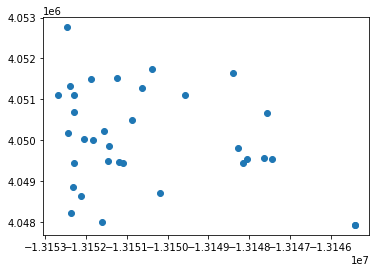

In [16]:
Pasadena.plot()

In [15]:
Pasadena = Pasadena.to_crs(3857)
# converted measurements to mercator, based on meters

In [ ]:
# get nodes and edges for pasadena, 

<AxesSubplot:>

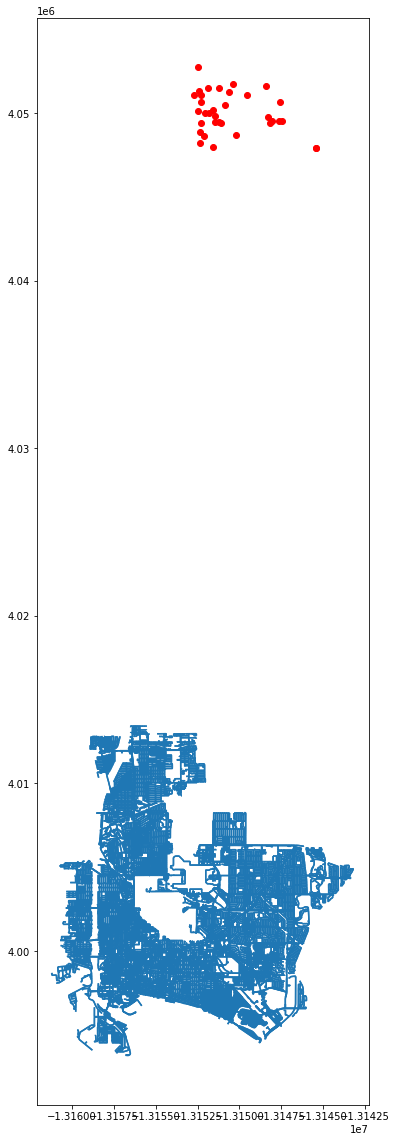

In [20]:
fig, ax = plt.subplots(figsize = (20,20))
Pasadena.plot(ax=ax, color='red')
gdf_edges.plot(ax=ax)